# IBM Developer Skills Network

# Image Datasets and Transforms

In [2]:
# Image data link
# 'https://github.com/sonpn82/Deep-Neural-Networks-with-PyTorch/tree/master/img'
# 'https://github.com/sonpn82/Deep-Neural-Networks-with-PyTorch/blob/master/index.csv?raw=true'

In [5]:
import matplotlib.pylab as plt
from matplotlib.pyplot import imshow
import numpy as np
import pandas as pd

import torch
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)     # force random function to give same number each time

from PIL import Image  # Pillow
import os

In [3]:
# Function to show data
def show_data(data_sample, shape=(28, 28)):  # data_sample is a tensor
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')  # convert tensor to numpy array for plotting
    plt.title('y= ' + data_sample[1])

In [7]:
# File name and location
directory = ""
csv_file = 'index.csv'
csv_path = os.path.join(directory, csv_file)

In [8]:
# Read the csv file
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


The first column of the dataframe corresponds to the type of clothing. The second column is the name of the image file corresponding to the clothing. <br> You can obtain the path of the first file by using the method  DATAFRAME.iloc[0, 1]. The first argument corresponds to the sample number, and the second input corresponds to the column index.

In [9]:
# file name in 2nd col
print('file name:', data_name.iloc[0, 1])

file name: img/fashion0.png


In [10]:
# label value in 1st col
print('y', data_name.iloc[0, 0])

y Ankle boot


In [11]:
# Print out the file name and the class number of the element on row 1 (the second row)

print('File name:', data_name.iloc[1, 1])
print('class or y:', data_name.iloc[1, 0])

File name: img/fashion1.png
class or y: T-shirt


In [12]:
# Total number of rows
print('number = ', data_name.shape[0])

number =  60000


# Load Image

In [13]:
image_name = data_name.iloc[1,1]
image_name

'img/fashion1.png'

In [14]:
# image path
image_path = os.path.join(directory, image_name)
image_path

'img/fashion1.png'

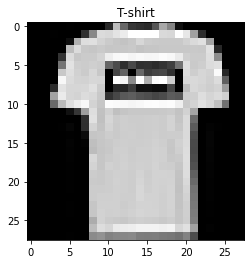

In [15]:
# Plot the image
image = Image.open(image_path)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)  # vmin, max: define datarange that color map cover
plt.title(data_name.iloc[1, 0])
plt.show()

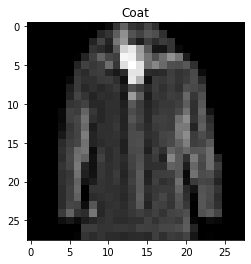

In [16]:
# Plot the 20th image

image_name = data_name.iloc[19, 1]
image_path=os.path.join(directory,image_name)
image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[19, 0])
plt.show()

# Create a Dataset Class

In [21]:
class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        # Image directory
        self.data_dir = data_dir

        # Transform
        self.transform = transform
        data_dircsv_file = os.path.join(self.data_dir, csv_file)

        # Load the CSV file
        self.data_name = pd.read_csv(data_dircsv_file)

        # Number of image
        self.len = self.data_name.shape[0]
    
    # Get the length
    def __len__(self):
        return self.len

    # Getter
    def __getitem__(self, idx):
        # Image file path
        img_name = os.path.join(self.data_dir, self.data_name.iloc[idx, 1])

        # Open image file
        image = Image.open(img_name)

        # The class label
        y = self.data_name.iloc[idx, 0]

        # Apply transform
        if self.transform:
            image = self.transform(image)
        
        return image, y

Each sample of the image and the class y is stored in a tuple  dataset[sample] . <br> The image is the first element in the tuple  dataset[sample][0] the label or class is the second element in the tuple  dataset[sample][1].

In [22]:
# Create the dataset
dataset = Dataset(csv_file=csv_file, data_dir=directory)

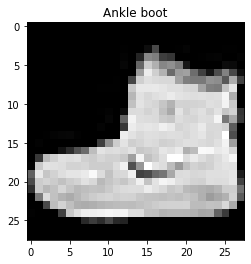

In [23]:
# Plot the 1st image and class
image = dataset[0][0]
y = dataset[0][1]

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

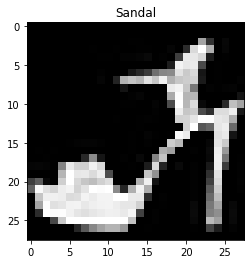

In [24]:
# 2nd image
image=dataset[9][0]
y=dataset[9][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

# Torch vision transform

In [25]:
import torchvision.transforms as transforms

In [26]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset
croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file, data_dir=directory, transform=croptensor_data_transform)
print("The shape of the first element tensor: ", dataset[0][0].shape)

The shape of the first element tensor:  torch.Size([1, 20, 20])


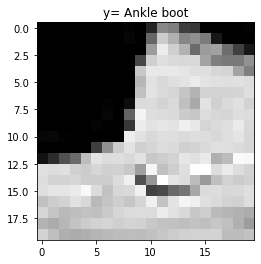

In [27]:
# Plot the 1st element in the dataset
show_data(dataset[0], shape=(20, 20))

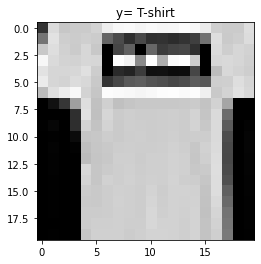

In [28]:
# Plot the 2nd element in the dataset
show_data(dataset[1], shape=(20, 20))

In [39]:
# Practice
croptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1), transforms.RandomHorizontalFlip(p=1), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file, data_dir=directory, transform=croptensor_data_transform)
print("The shape of the first element tensor: ", dataset[0][0].shape)

The shape of the first element tensor:  torch.Size([1, 28, 28])


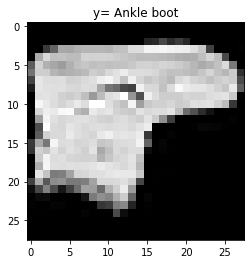

In [40]:
# Plot the 1st element in the dataset
show_data(dataset[0], shape=(28, 28))

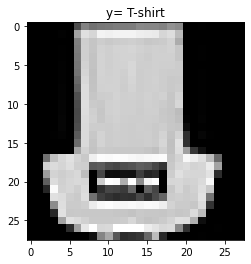

In [41]:
# Plot the 2nd element in the dataset
show_data(dataset[1], shape=(28, 28))